As mentioned in the Word Embeddings notebook, there are many ways to train a Neural Network to produce a Word Embedding matrix for a given vocabulary.

One of the more popular implementations of this is [TensorFlow's Word2Vec](https://www.tensorflow.org/tutorials/representation/word2vec). This notebook should provide a high-level intuition of this training approach.

## Fake Task 

The key takeaway for understanding how we fit an embedding layer is that we set our data up to solve an arbitrary problem when iterating over a corpus of text. For instance:

>Given a random context word, `c`, how likely is it that we'll see a target word, `t`, within `N` spaces from the context?

Visually, this looks like the following

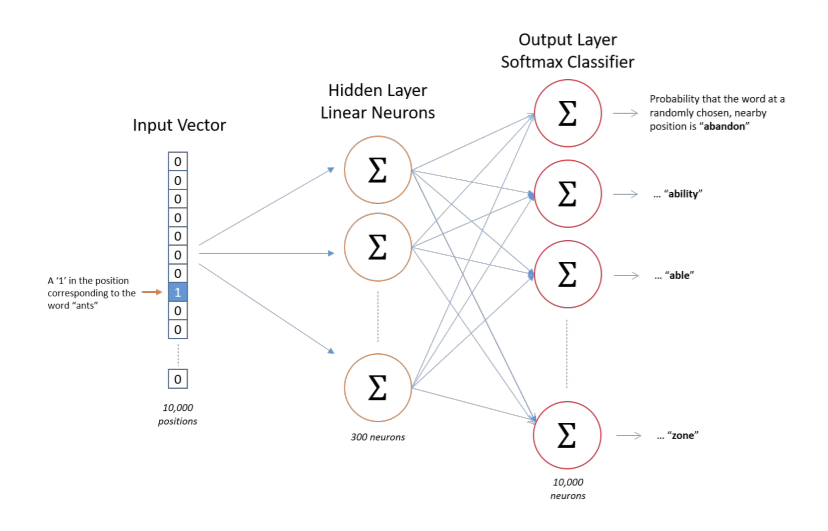

In [1]:
from IPython.display import Image

Image('images/word2vec_task.png')

Because this spits out to a softmax classifier, the outputs are calculated as



$Pr(t\vert c) = \frac{e^{\Theta^T e_c}}{\sum_j e^{\Theta^T_j e_c}}$

This means that we're learning both the Embedding Matrix, `E`, and some throw-away matrix, `Theta`, that we won't use after training.

However, this gets tricky when considering compute costs. Even in a 1000-word vocabulary (considered pretty small for text data), we're doing a **ton** of summing in these denominator terms, then again when calculating the cost function

$\mathcal{L}(\hat{y}, y) = - \sum y_i log(\hat{y_i})$

Not ideal. Instead we might try...

### Negative Sampling

Same idea. We want to build a fake task with the ultimate goal of extracting an Embedding Matrix, `E`.

Except this time, we're going to be more thoughtful about the way we sample our training data. Consider a sentence


    The quick brown fox jumped over the lazy dog
    
- We'd start, as before, by picking a context word: `fox`
- Then we pick a random word within `N` spaces from it. We'll say `dog`.
- Now (this is where it's different), we'll generate `k` random words from our vocabulary *that aren't within `N` of `fox`*
    
    
    apple, door, nebraska, eerie, his
    
- Finally we construct tuples of the form


    (fox, dog, 1)
    (fox, apple, 0)
    (fox, door, 0)
    (fox, nebraska, 0)
    (fox, eerie, 0)
    (fox, his, 0)

to optimize the equation

$Pr(y=1 \vert c, t) = \sigma(\Theta^t e_c)$

Or "given this context word and this taret word, how likely is it that they're within proximity of one another?"

So instead of training on `10k` values in our softmax layer each step, we're only training `k+1` binary classification tasks at a time.